In [2]:
# Show plots inline.
%matplotlib inline

from __future__ import division

# For creating plots.
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


import scipy as sp
from scipy.stats import norm
import scipy.stats as ss
import matplotlib.mlab as mlab
import math

# Use LateX for text in the plots.
# Use stix font.
mpl.rcParams.update({'font.size': 18, 'text.usetex': True, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

## Plots

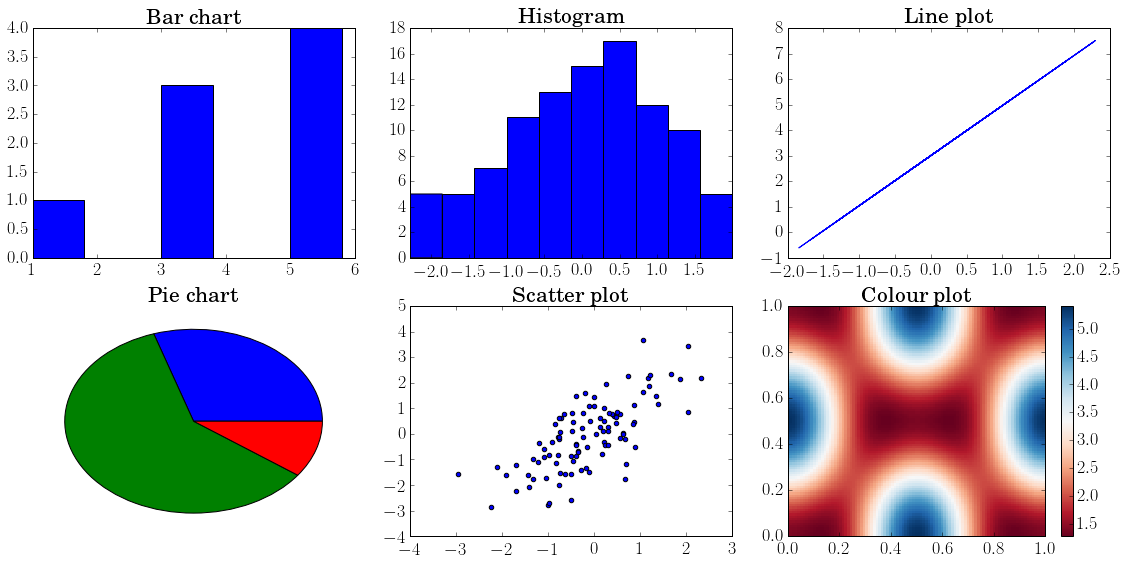

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))
fig.tight_layout()

# Bar chart
i = 0
j = 0
axes[i][i].bar([1, 3, 5], [1, 3, 4])
axes[j][j].set_title("Bar chart")

# Histogram
n = np.random.randn(100)
i = 0
j = 1
axes[i][j].hist(n)
axes[i][j].set_title("Histogram")
axes[i][j].set_xlim((min(n), max(n)))

# Line plot
i = 0
j = 2
x = np.random.randn(100)
y = 1.96 * x + 3
axes[i][j].plot(x, y)
axes[i][j].set_title("Line plot")

# Pie chart
i = 1
j = 0
axes[i][j].pie([30, 60, 10])
axes[i][j].set_title("Pie chart")

# Scatter plot
i = 1
j = 1
x = np.random.randn(100)
y = x + np.random.randn(100)
axes[i][j].scatter(x, y)
axes[i][j].set_title("Scatter plot")

# Colour plot
i = 1
j = 2
alpha = 0.7
phi_ext = 2 * np.pi * 0.5
def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T
p = axes[i][j].pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=mpl.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=axes[i][j])
axes[i][j].set_title("Colour plot")

## Basic Probability
Priors: $\quad p(a)$, $\quad p(\neg{a}) = 1- p(a)$

In [10]:
p_a = .9
p_not_a = 1. - p_a

$p(a, a) = p(a)p(a)$  assuming independence.

In [11]:
print "Truth Table"
print "a,         a = {}".format(p_a * p_a)
print "a,     not a = {}".format(p_a * p_not_a)
print "not a,     a = {}".format(p_not_a * p_a)
print "not a, not a = {}".format(p_not_a * p_not_a)
print "         Sum = {}".format(p_a * p_a + 2 * p_a * p_not_a + p_not_a * p_not_a)

Truth Table
a,         a = 0.81
a,     not a = 0.09
not a,     a = 0.09
not a, not a = 0.01
         Sum = 1.0


## Conditional Probability
Evidence: $\quad p(b \mid a)$, $\quad p(\neg{b} \mid a) = 1-p(b \mid a)$

In [12]:
p_b_given_a = 0.9
p_not_b_given_a = 1. - p_b_given_a

p_b_given_not_a = 0.2
p_not_b_given_not_a = 1. - p_b_given_not_a

Joint Probability: $\quad p(a,b) = p(b \mid a)p(a) = Evidence \times Prior$

In [13]:
print "Truth Table"
print "a, b"
print "T, T = {}".format(p_a * p_b_given_a)
print "T, F = {}".format(p_a * p_not_b_given_a)
print "F, T = {}".format(p_not_a * p_b_given_not_a)
print "F, F = {}".format(p_not_a * p_not_b_given_not_a)
print "Sum  = {}".format(p_a * p_b_given_a + p_not_a * p_b_given_not_a + p_a 
                         * p_not_b_given_a + p_not_a * p_not_b_given_not_a)

Truth Table
a, b
T, T = 0.81
T, F = 0.09
F, T = 0.02
F, F = 0.08
Sum  = 1.0


Total probability: $p(b) = p(b|a)p(a) + p(b|\neg{a})p(\neg{a})$

In [14]:
print "b = {}".format(p_b_given_a*p_a + p_b_given_not_a*p_not_a)

b = 0.83


Question: I have two coins. One fair and one which flips head 90% of the time. If I randomly pick one and flip it twice, what is then the probability to get the sequence: "Head, Tail"?

In [15]:
# Coin picking probabilities.
p_pick_c1 = .5
p_pick_c2 = 1. - p_pick_c1
# Coing 1 probabilities.
p_c1_h = .5         
p_c1_t = 1. - p_c1_h
# Coing 2 probabilities.
p_c2_h = .9         
p_c2_t = 1. - p_c2_h
# Sequence "H, T" proabability
print  p_pick_c1 * p_c1_h * p_c1_t + p_pick_c2 * p_c2_h * p_c2_t

0.17


## Bayes Rule

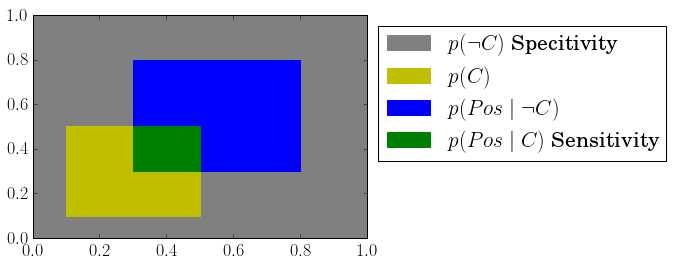

In [36]:
r1 = mpl.patches.Rectangle((0.0, 0.0), 1.0, 1.0, label='$p(\\neg{C})$ Specitivity')
r2 = mpl.patches.Rectangle((0.1, 0.1), 0.4, 0.4, label='$p(C)$')
r3 = mpl.patches.Rectangle((0.3, 0.3), 0.5, 0.5, label='$p(Pos\\mid\\neg{C})$')
r4 = mpl.patches.Rectangle((0.3, 0.3), 0.2, 0.2, label='$p(Pos\\mid C)$ Sensitivity')

r1.set_color('gray')
r2.set_color('y')
r3.set_color('b')
r4.set_color('g')

rs = [r1, r2, r3, r4]

fig = plt.figure(None)
ax = fig.gca()

for p in rs:
    ax.add_patch(p)
  
plt.legend(loc='outside',bbox_to_anchor=(1., 1.0))    
plt.show()

Priors  
$p(C)$  
Sensitivity: $\quad p(Pos\mid C)$  
Specitivity: $\quad p(Neg\mid \neg{C})$  

In [37]:
p_c = .1
p_nc = 1 - p_c

p_pos_given_c = .9 # Sensitivity.
p_neg_given_c = 1. - p_pos_given_c

p_neg_given_nc = .5 # Specitivity.
p_pos_given_nc = 1. - p_neg_given_nc

Joint probabilities  
$p(C, Pos) = p(C)p(Pos\mid C)$  
$p(\neg{C}, Pos) = p(\neg{C})p(Pos\mid \neg{C})$  

In [38]:
p_c_given_pos = p_c * p_pos_given_c
print " C, Pos = {}".format(p_c_given_pos)
p_nc_given_pos = p_nc * p_pos_given_nc
print "nC, Pos = {}".format(p_nc_given_pos)

 C, Pos = 0.09
nC, Pos = 0.45


So we now have the actual sizes of $p(Pos, C)$ and $p(Pos, \neg{C})$  

To get the actual posterior chances we need to normalize by $p(Pos) = p(Pos, C) + p(Pos, \neg{C})$

In [39]:
# Normalizer.
p_pos = p_c_given_pos + p_nc_given_pos
print "Pos = {}".format(p_pos)

Pos = 0.54


In [20]:
# Posteriors.
p_c_given_pos = (p_c * p_pos_given_c) / p_pos
print " C given Pos = {}".format(p_c_given_pos)
p_nc_given_pos = (p_nc * p_pos_given_nc) / p_pos
print "nC given Pos = {}".format(p_nc_given_pos)

 C given Pos = 0.166666666667
nC given Pos = 0.833333333333


Bayes Generalisation: Basically extent $p(b) = \dots$

$\quad 1 = p(b\mid a)p(a)+p(b\mid \neg{a})p(\neg{a})+p(\neg{b}\mid a)p(a)+p(\neg{b}\mid \neg{a})p(\neg{a})$  


## Probability Distributions
* Specific values within a continuous distributions have a change of 0%, use intervals instead.  
* A Probability Density Function is a non-negative function which integrates to 1.

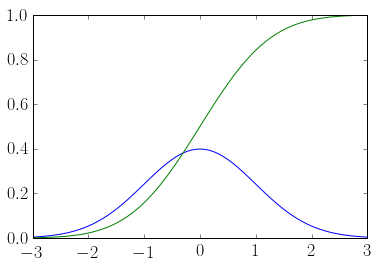

In [21]:
xs = np.linspace(-3, 3, 100)
plt.plot(xs, ss.norm.pdf(xs), label='pdf')
plt.plot(xs, ss.norm.cdf(xs), label='cdf')

## Correlation & Causation
You have a higher chance of dying in the hospital, is the hospital causing death? No, a third variable, being sick, influences your mortality and the chance of you being in a hospital. This is called the confounding variable.

## Estimation
* Given a data sequence, what is the according probability of each value in the sequence?  
* MLE: $\frac{1}{n}\sum_{i}{x_{i}}$

In [22]:
x = [1, 2, 2, 1, 3, 2]
n = float(len(x))
print 'p(1) = {}'.format(x.count(1)/n)
print 'p(2) = {}'.format(x.count(2)/n)
print 'p(3) = {}'.format(x.count(3)/n)
print 'sum  = {}'.format((x.count(1)+x.count(2)+x.count(3))/n)

p(1) = 0.333333333333
p(2) = 0.5
p(3) = 0.166666666667
sum  = 1.0


Maximum Likelihood Estimation (MLE): $data \rightarrow p \rightarrow p(data)$

74


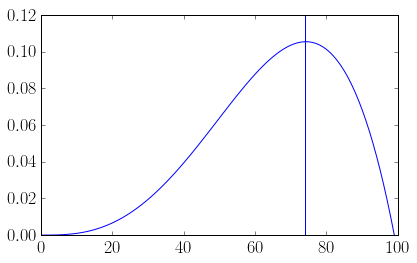

In [23]:
def MLE(data, prob_one):
    prob_zero = 1 - prob_one
    prob = 1.
    for i in data:
        if i == 1:
            prob *= prob_one
        else:
            prob *= prob_zero
    return prob

x = [1, 0, 1, 1]
xs = np.linspace(0, 1, 100)
probs = [MLE(x, i) for i in xs]
mle_prob = np.argmax(probs)
# So the probability density function which produces a 1 with a chance
# equal to "mle_prob" is the most likely one to have produces the 
# sequence "x".
print mle_prob 

fig, axes = plt.subplots(1, 1)
fig.tight_layout()
axes.plot(probs)
axes.axvline(mle_prob)

MLE is heavily biased when only a few examples are available. For the extreme case where we pnly have a single example, it gives that values a chance of 100%.  
(Also performing an uneven amount of experiments in the coin case results always in a biased probability)

In [24]:
x = [1]
n = float(len(x))
print 'p(1) = {}'.format(x.count(1)/n)
print 'p(2) = {}'.format(x.count(2)/n)
print 'p(3) = {}'.format(x.count(3)/n)
print 'sum  = {}'.format((x.count(1)+x.count(2)+x.count(3))/n)

p(1) = 1.0
p(2) = 0.0
p(3) = 0.0
sum  = 1.0


This bias can be countered by using Laplacian Estimation.  
Laplacian: $\frac{1}{n+k}(1+\sum_{i}{x_{i}})$

In [25]:
x = [1] + [1, 2, 3] # Add dirichlet priors
n = float(len(x))
print 'p(1) = {}'.format(x.count(1)/n)
print 'p(2) = {}'.format(x.count(2)/n)
print 'p(3) = {}'.format(x.count(3)/n)
print 'sum  = {}'.format((x.count(1)+x.count(2)+x.count(3))/n)

p(1) = 0.5
p(2) = 0.25
p(3) = 0.25
sum  = 1.0


## Definitions
#### Gaussian  

* Mean: average value $\frac{1}{n}\sum_{i}^{n}{x_{i}}$
* Empiric Variance (2-pass): $\sigma^{2} = \frac{1}{n} \sum_{i}^{n}{(x_{i}-\mu)^{2}} $  
Also analytic: $Var(X) = p(1-p)^{2}+(1-p)p^{2} = p(1-p)$ with $p=Mean(X)$  
TODO program analytic vs empiric
* Variance (1-pass): $\sigma^{2} = \frac{\sum{x_{i}^{2}}}{n}-\frac{(\sum{x_{i}})^{2}}{n^{2}}$
* Standard Deviaton: $\sigma = \sqrt{ \frac{1}{n} \sum_{i}^{n}{(x_{i}-\mu)^{2}} } $  
* Adding a constant to each data value, adds that constant only to the $\mu$.
* Multiplying a constant to each data value, multiplies $\mu$ and $\sigma$ with that constant, or in other words: $Var(aX) = a^{2}Var(X)$.

#### Other
* Median: middle value
* Mode: most frequent value
* x Percentile: x% of the ordered data
* Covariance: $\sum_{i}^{n}{ (x_{i} - \mu_{x}) (y_{i} - \mu_{y}) }$
* Standard Score: $z = \frac{x-\mu}{\sigma}$  
Objective score signifying how far a data point is from the mean, relatively speaking

## Outliers
* Use quartiles to remove them.  
Inter Quartile Range: ..[x..x..x].. (outlier free)  
Lower Quartile Range: [..x]..x..x..  
Upper  Quartile Range: ..x..x..[x..]  
* There is discussion about the fact if the "x" need to be ex- or included.

## Binomial Distribution
* n choose k: $ \frac{n!}{k!(n-k)!} $  
    - $n!$ is the number of configurations that can be made with the A+B cases.  
We divide out:  
    - $k!$ is the number of configurations that can be made with the A cases.  
    - $(n-k)!$ is the number of configurations that can be made with the B cases.
* Exact chance of the A/B sequence: $ \frac{n!}{k!(n-k)!} p^{k} (1-p)^{n-k} $
* Exponential explosion
* Pascal's triangle


## Central Limit Theorem (CLT)
If we take the mean from many samples from a random variable, having any kind of PDF, and the sample size is large enough (>= 30), then the values of that mean follow a Gaussian distribution.  
Or put differently: $ \sum_{i}^{n}{X_{i}} $ from a random variable $X$ and $n\geq30$ results in a normal distribution.

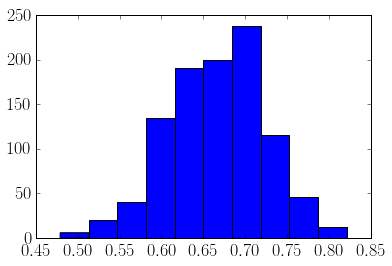

In [26]:
n_elements = 40
n_experiments = 1000

# Some random distributions
x = [np.mean(np.random.beta(0.4, 0.2, n_elements)) for i in xrange(n_experiments)]
plt.hist(x);

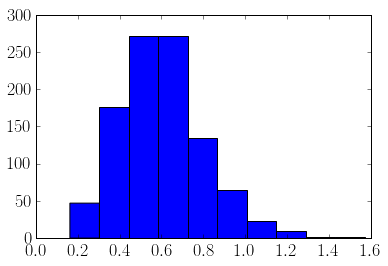

In [27]:
x = [np.mean(np.random.noncentral_chisquare(0.4, 0.2, n_elements)) for i in xrange(n_experiments)]
plt.hist(x);

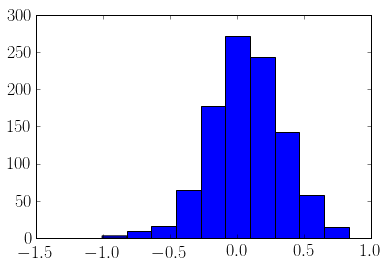

In [28]:
x = [np.mean(np.random.vonmises(0.4, 0.2, n_elements)) for i in xrange(n_experiments)]
plt.hist(x);

## Normal Distribution
For a single experiment we use probabilities, for a few we use the binomial distribution, and for many experiments we use the normal distribution. The formula for the normal distribution is: 

$$\frac{1}{\sqrt{2\pi\sigma^{2}}} e^{-\frac{1}{2}\frac{(x-\mu)^{2}}{\sigma^{2}}} $$

Below I show what the different parts of the normal distribution's formula do:

In [29]:
def normal_dist(mu=0.0, variance=1.0):
    return np.linspace(-3.*sigma+mu, 3.*sigma+mu, 100) # Show 99% of the Gaussian using the 3 stddev rule.

# Define Gaussian.
mu = 0.3
variance = 1.2
sigma = math.sqrt(variance)
x = normal_dist(mu, variance)

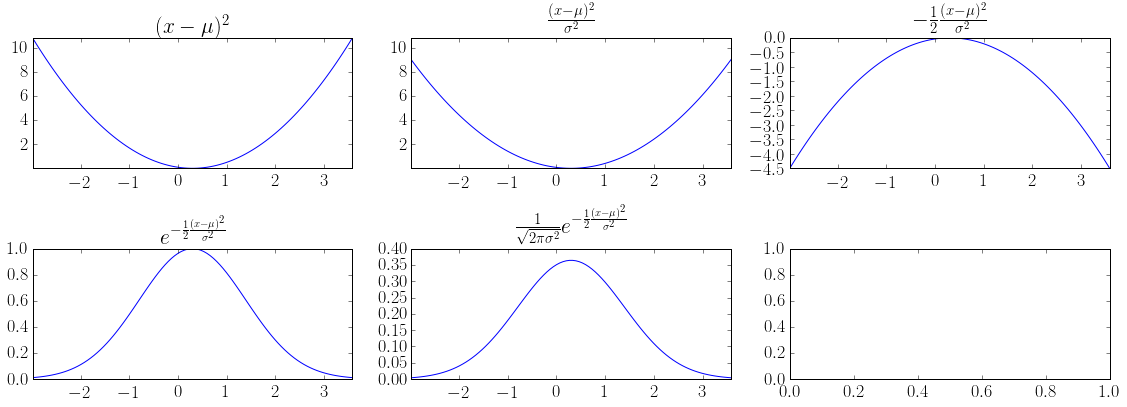

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))

y = [(i - mu)**2 for i in x]
ax = axes[0, 0]
ax.plot(x, y)
ax.set_title("$(x - \mu)^{2}$")
ax.set_xlim([min(x), max(x)]);
ylims = ax.set_ylim([min(y), max(y)])
y_prev = y

y = [i / variance for i in y_prev]
ax = axes[0, 1]
ax.plot(x, y)
ax.set_title("$\\frac{(x - \mu)^{2}}{\sigma^{2}}$")
ax.set_xlim([min(x), max(x)]);
ax.set_ylim(ylims);
y_prev = y

y = [-0.5*i for i in y_prev]
ax = axes[0, 2]
ax.plot(x, y)
ax.set_title("$-\\frac{1}{2}\\frac{(x - \mu)^{2}}{\sigma^{2}}$")
ax.set_xlim([min(x), max(x)]);
y_prev = y

y = [math.e**i for i in y_prev]
ax = axes[1, 0]
ax.plot(x, y)
ax.set_title("$e^{-\\frac{1}{2}\\frac{(x - \mu)^{2}}{\sigma^{2}}}$")
ax.set_xlim([min(x), max(x)]);
y_prev = y

y = [i/math.sqrt(2*math.pi*variance) for i in y_prev]
ax = axes[1, 1]
ax.plot(x, y)
ax.set_title("$\\frac{1}{\sqrt{2\pi\sigma^{2}}} e^{-\\frac{1}{2}\\frac{(x - \mu)^{2}}{\sigma^{2}}}$") # TODO to lateX
ax.set_xlim([min(x), max(x)]);

fig.tight_layout()

When adding Gaussians, add also their $\mu$ and $\sigma^2$

In [31]:
n = 1000

# Gaussian A
A_mu = .3
A_sigma = np.sqrt(.3)
A_y = np.random.normal(A_mu, A_sigma, n)

# Gaussian B
B_mu = .4
B_sigma = np.sqrt(.1)
B_y = np.random.normal(B_mu, B_sigma, n)

print "A:   Mean = {}, Var = {}".format(np.mean(A_y),np.var(A_y))
print "A:   Mean = {}, Var = {}".format(np.mean(B_y),np.var(B_y))
print "A+B: Mean = {}, Var = {}".format(np.mean(A_y+B_y),np.var(A_y+B_y))

A:   Mean = 0.252730089916, Var = 0.297751868734
A:   Mean = 0.400464350854, Var = 0.101229239657
A+B: Mean = 0.653194440771, Var = 0.389114865857


## Confidence Intervals
* The confidence interval (CI) indicates the margin of error. Typically we say that with a confidence of 95% the true mean lies within x distance from the sample mean $\mu$, so more data results in a smaller CI. Whereas the $\sigma$ stays the same.
* For $n\geq30$ then $\propto \frac{\sigma}{\sqrt{n}}$ TODO standard error?
* CI$= \mu \pm a \sqrt{\frac{\sigma^{2}}{n}}$. Note: $\sigma^{2} = p(n-p)$.
* $1.96 \sqrt{\frac{\sigma^{2}}{n}}$ for $95\%$ (quantile) confidence interval. Change coefficient using z-table for other confidence   
    intervals.
* $var(\mu) \rightarrow stddev \rightarrow \times1.96$
* T-table (1 vs 2 tails) -> degrees of freedom = n - 1

Quantiles

## Hypothesis Testing
* Null-hypothesis: $H_{0}$  
Alternate-hypothesis $H_{1}$
* 1 vs 2 tails tests.

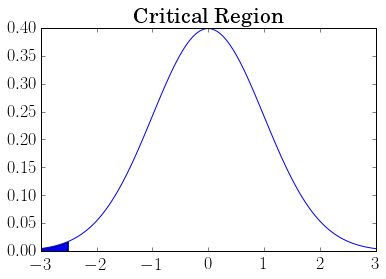

In [32]:
# Below we display the Gaussian belonging to a null-hypothesis. This 
# hypothesis gets rejected if a sample shows values belonging to the 
# critical region, colored blue here. We then say: "The chance of 
# finding these values was smaller than 'x' (5%), thus it seems to 
# unlikely that the null-hypothesis holds."
fig, axes = plt.subplots(1, 1)
x = np.linspace(-3, 3, 100)
y = norm.pdf(x)
axes.fill_between(x, 0, y, where=x<-2.5)
axes.plot(x,y)
axes.set_title('Critical Region')

Question: We flip a coin which lands heads with probability 0.9 15 times. The number of heads flipped in a sequence is called 'x'. For what value of 'x' do we NOT believe (with 95% certainty) it was from this coin?  
Answer: See below. When the accumulated chance has not exceeded 5%, we do not accept it. Thus 10 of 15 heads is rejected, 11 of 15 heads is accepted.

In [33]:
def binomial_probs(n, k, p):
    prob = math.factorial(n)/(math.factorial(k)*math.factorial(n-k))
    prob *= p**k
    prob *= (1-p)**(n-k)
    return prob

total = 0
n = 15
for i in range(n+1):
    prob = binomial_probs(n, i, 0.9)
    if prob + total > 0.05 and total < 0.05:
        print "-----------------"
    total += prob
    print "{}: {}".format(i, prob)

0: 1e-15
1: 1.35e-13
2: 8.505e-12
3: 3.31695e-10
4: 8.955765e-09
5: 1.77324147e-07
6: 2.659862205e-06
7: 3.0778405515e-05
8: 0.000277005649635
9: 0.00193903954744
10: 0.0104708135562
-----------------
11: 0.0428351463663
12: 0.128505439099
13: 0.266895911975
14: 0.343151886824
15: 0.205891132095


## Hypothesis Testing & Condifence Intervals
* take a sample, measure mean, calculate CI around predicted mean, is the sample mean within the CI?  
* Get $t(n-1, p) = a$ and use CI$= \mu \pm a \sqrt{\frac{\sigma^{2}}{n}}$.  
* For this to work we do need randomness! Random samples!

In [34]:
# Null-Hypothesis.
avg_age = 26
# Sample.
x = 4 * [21] + 6 * [24] + 7 * [26] + 11 * [29] + 2 * [40]
# Get the mean.
m = np.mean(x)
# Get the variance.
v = np.var(x)
# Get the 'a' value.
a = 2.045 # two-tails, 95% confidence, degrees of freedom = 30 - 1
# Get size of the CI.
n = len(x)
ci = a * math.sqrt(v/n)
lb = m - a
ub = m + a
# Test if the null-hypothesis is within the CI.
accepted = lb <= avg_age and avg_age <= ub
print "We see the null-hypothesis as: {}".format(accepted)

We see the null-hypothesis as: True


### Class
* $\widehat{\pi} = p$  
* 15 per category for CLT  
* Als steekproef grootte >= 30 vanwege CLT neem z-table, anders neem aan normaal verdeling en gebruik t-table.
* p (kans op de waarnemingen die we doen), t(in geval van t, de afstand in sigma), z(in geval van z, de afstand in sigma) waarde?  
* t-test: kloppen de hypo's? CI-test: wat zijn te verwachten waarden?
* Never accept null-hypothesis,  only reject or not reject.
* Proportie: k/n that are 1/0.
* What is better? one test with 200, or two with 100.

## Linear Regression
* Fit formula of the form $y = ax + b$
* Covariance: $\sum_{i}^{n}{ (x_{i} - \mu_{x}) (y_{i} - \mu_{y}) }$
* $a = \frac{ \sum_{i}^{n}{ (x_{i} - \mu_{x}) (y_{i} - \mu_{y}) } }{ \sum_{i}^{n}{ (x_{i} - \mu_{x})^{2} } }$
* $b = \mu_{y} - a \mu_{x}$

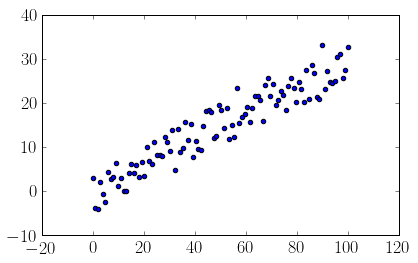

In [70]:
fig, axes = plt.subplots(1, 1)
fig.tight_layout()

n = 100
x = np.linspace(0, 100, n)
a = 0.3
b = 0.2
noise = np.random.normal(0, 3, n)
y_0 = a*x + b + noise

axes.scatter(x, y_0);

In [63]:
def mu(x):
    s = 0
    for i in x:
        s += i
    return s / len(x)

def sigma(x):
    m = mu(x)
    s = 0
    for i in x:
        s += (i - m)**2
    return s

def cov(x, y):
    assert len(x) == len(y)
    mx = mu(x)
    my = mu(y)
    s = 0
    for i in range(len(x)):
        s += (x[i] - mx)*(y[i] - my)
    return s

def a(x, y):
    return cov(x, y) / sigma(x)

print a(x, y_0)

0.288576633225


In [61]:
def b(x, y):
    return mu(y) - (a(x, y) * mu(x))

print b(x, y_0)

0.328451422951


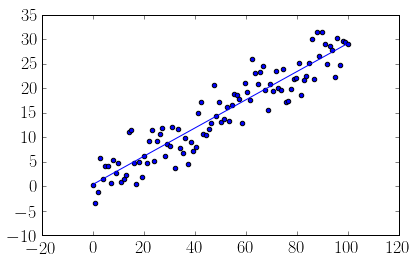

In [64]:
fig, axes = plt.subplots(1, 1)
fig.tight_layout()
y_1 = a(x, y_0) * x + b(x, y_0)
axes.plot(x, y_1)
axes.scatter(x, y_0)

## Correlation
$r = \frac{ \sum_{i}^{n}{ (x_{i} - \mu_{x}) (y_{i} - \mu_{y}) } }{ \sqrt{ \sum_{i}^{n}{ (x_{i} - \mu_{x})^{2}} \sum_{(y_{i} - \mu_{y})^{2} } } }$

In [71]:
def r(x, y):
    return cov(x, y) / (sigma(x) * sigma(y))**.5

print r(x, y_0)
x = np.random.normal(0, 3, n)
y = np.random.normal(0, 3, n)
print r(x, y)

0.943582078144
0.116967046294
